### IMPORT LIBRARIES

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [2]:
rentals_dataset = pd.read_csv('rentals_dataset.csv', index_col=0)

### Data Exploration and Analysis

#### Number of rentals rented across the towns
Bar plot in descending order

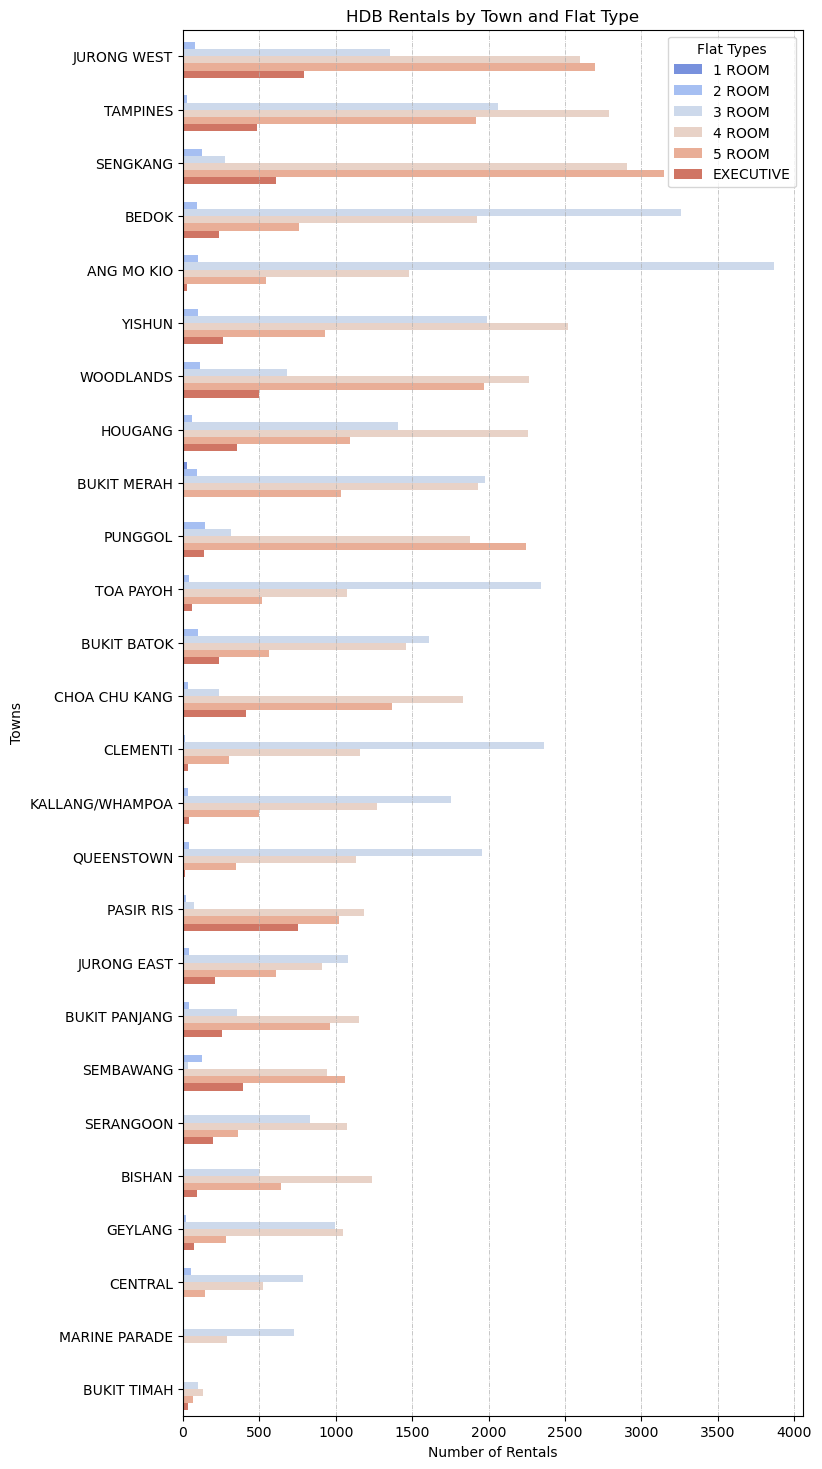

In [3]:
### Set Data Table ###
# Group the data by 'town' and 'flat_type' and count the occurrences
town_rentals = rentals_dataset.groupby(['town', 'flat_type']).size().unstack(fill_value=0)

# Calculate total rentals per town
total_rentals_per_town = town_rentals.sum(axis=1)

# Melt the DataFrame to long format
town_rentals_long = town_rentals.reset_index().melt(id_vars='town', var_name='flat_type', value_name='count')

# Merge total rentals into the long DataFrame
town_rentals_long = town_rentals_long.merge(total_rentals_per_town.rename('total_rentals'), on='town')

# Sort the DataFrame first by total rentals, then by flat type
town_rentals_long_sorted = town_rentals_long.sort_values(by=['total_rentals', 'flat_type'], 
                                                         ascending=[False, True])

### Plotting ###
# Set color palette, built-in palettes: 'coolwarm', 'viridis', 'rocket'.
palette = "coolwarm" 

# Create a bar plot with the sorted data
plt.figure(figsize=(8, 18))
sns.barplot(data=town_rentals_long_sorted, y='town', x='count', hue='flat_type', palette=palette)

# Graph Formatting
plt.grid(True, axis='x', linestyle='-.', linewidth=0.5)
plt.xlabel('Number of Rentals')
plt.ylabel('Towns')
plt.title('HDB Rentals by Town and Flat Type')
plt.legend(title='Flat Types')

plt.show()


#### Overall Rentals Trends
Line plot - x: date, y:count

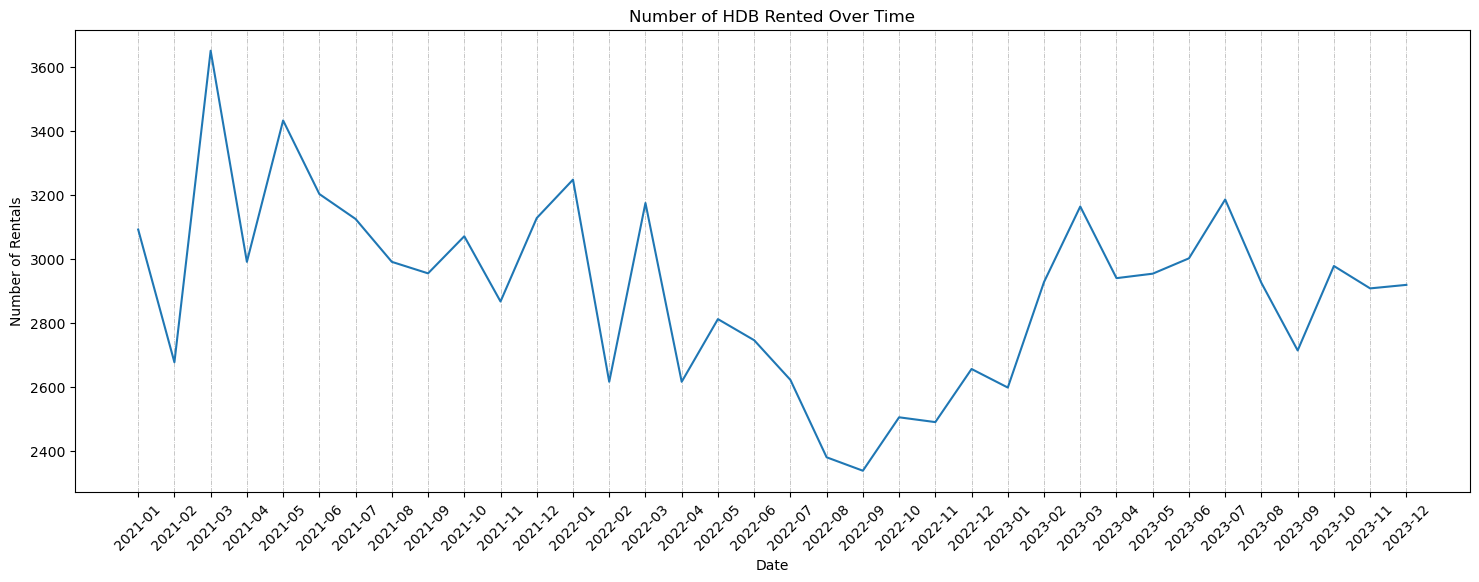

In [4]:
### Set Data Table ###
# Calculate the value counts and convert to DataFrame
rentals_trend = rentals_dataset['date'].value_counts().sort_index()
rentals_trend_df = rentals_trend.reset_index()
rentals_trend_df.columns = ['date', 'count']

### Plotting ###
# Create the line plot using Seaborn
plt.figure(figsize=(18, 6))
g = sns.lineplot(data=rentals_trend_df, x='date', y='count')

# Graph Formatting
plt.grid(True, axis='x', linestyle='-.', linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.title('Number of HDB Rented Over Time')
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### HDB rental price trend over time overall

#### HDB rental price trend over time by town,

#### Number of HDB Rented Trends over time by Towns
Line plot - x: date, y:count by towns

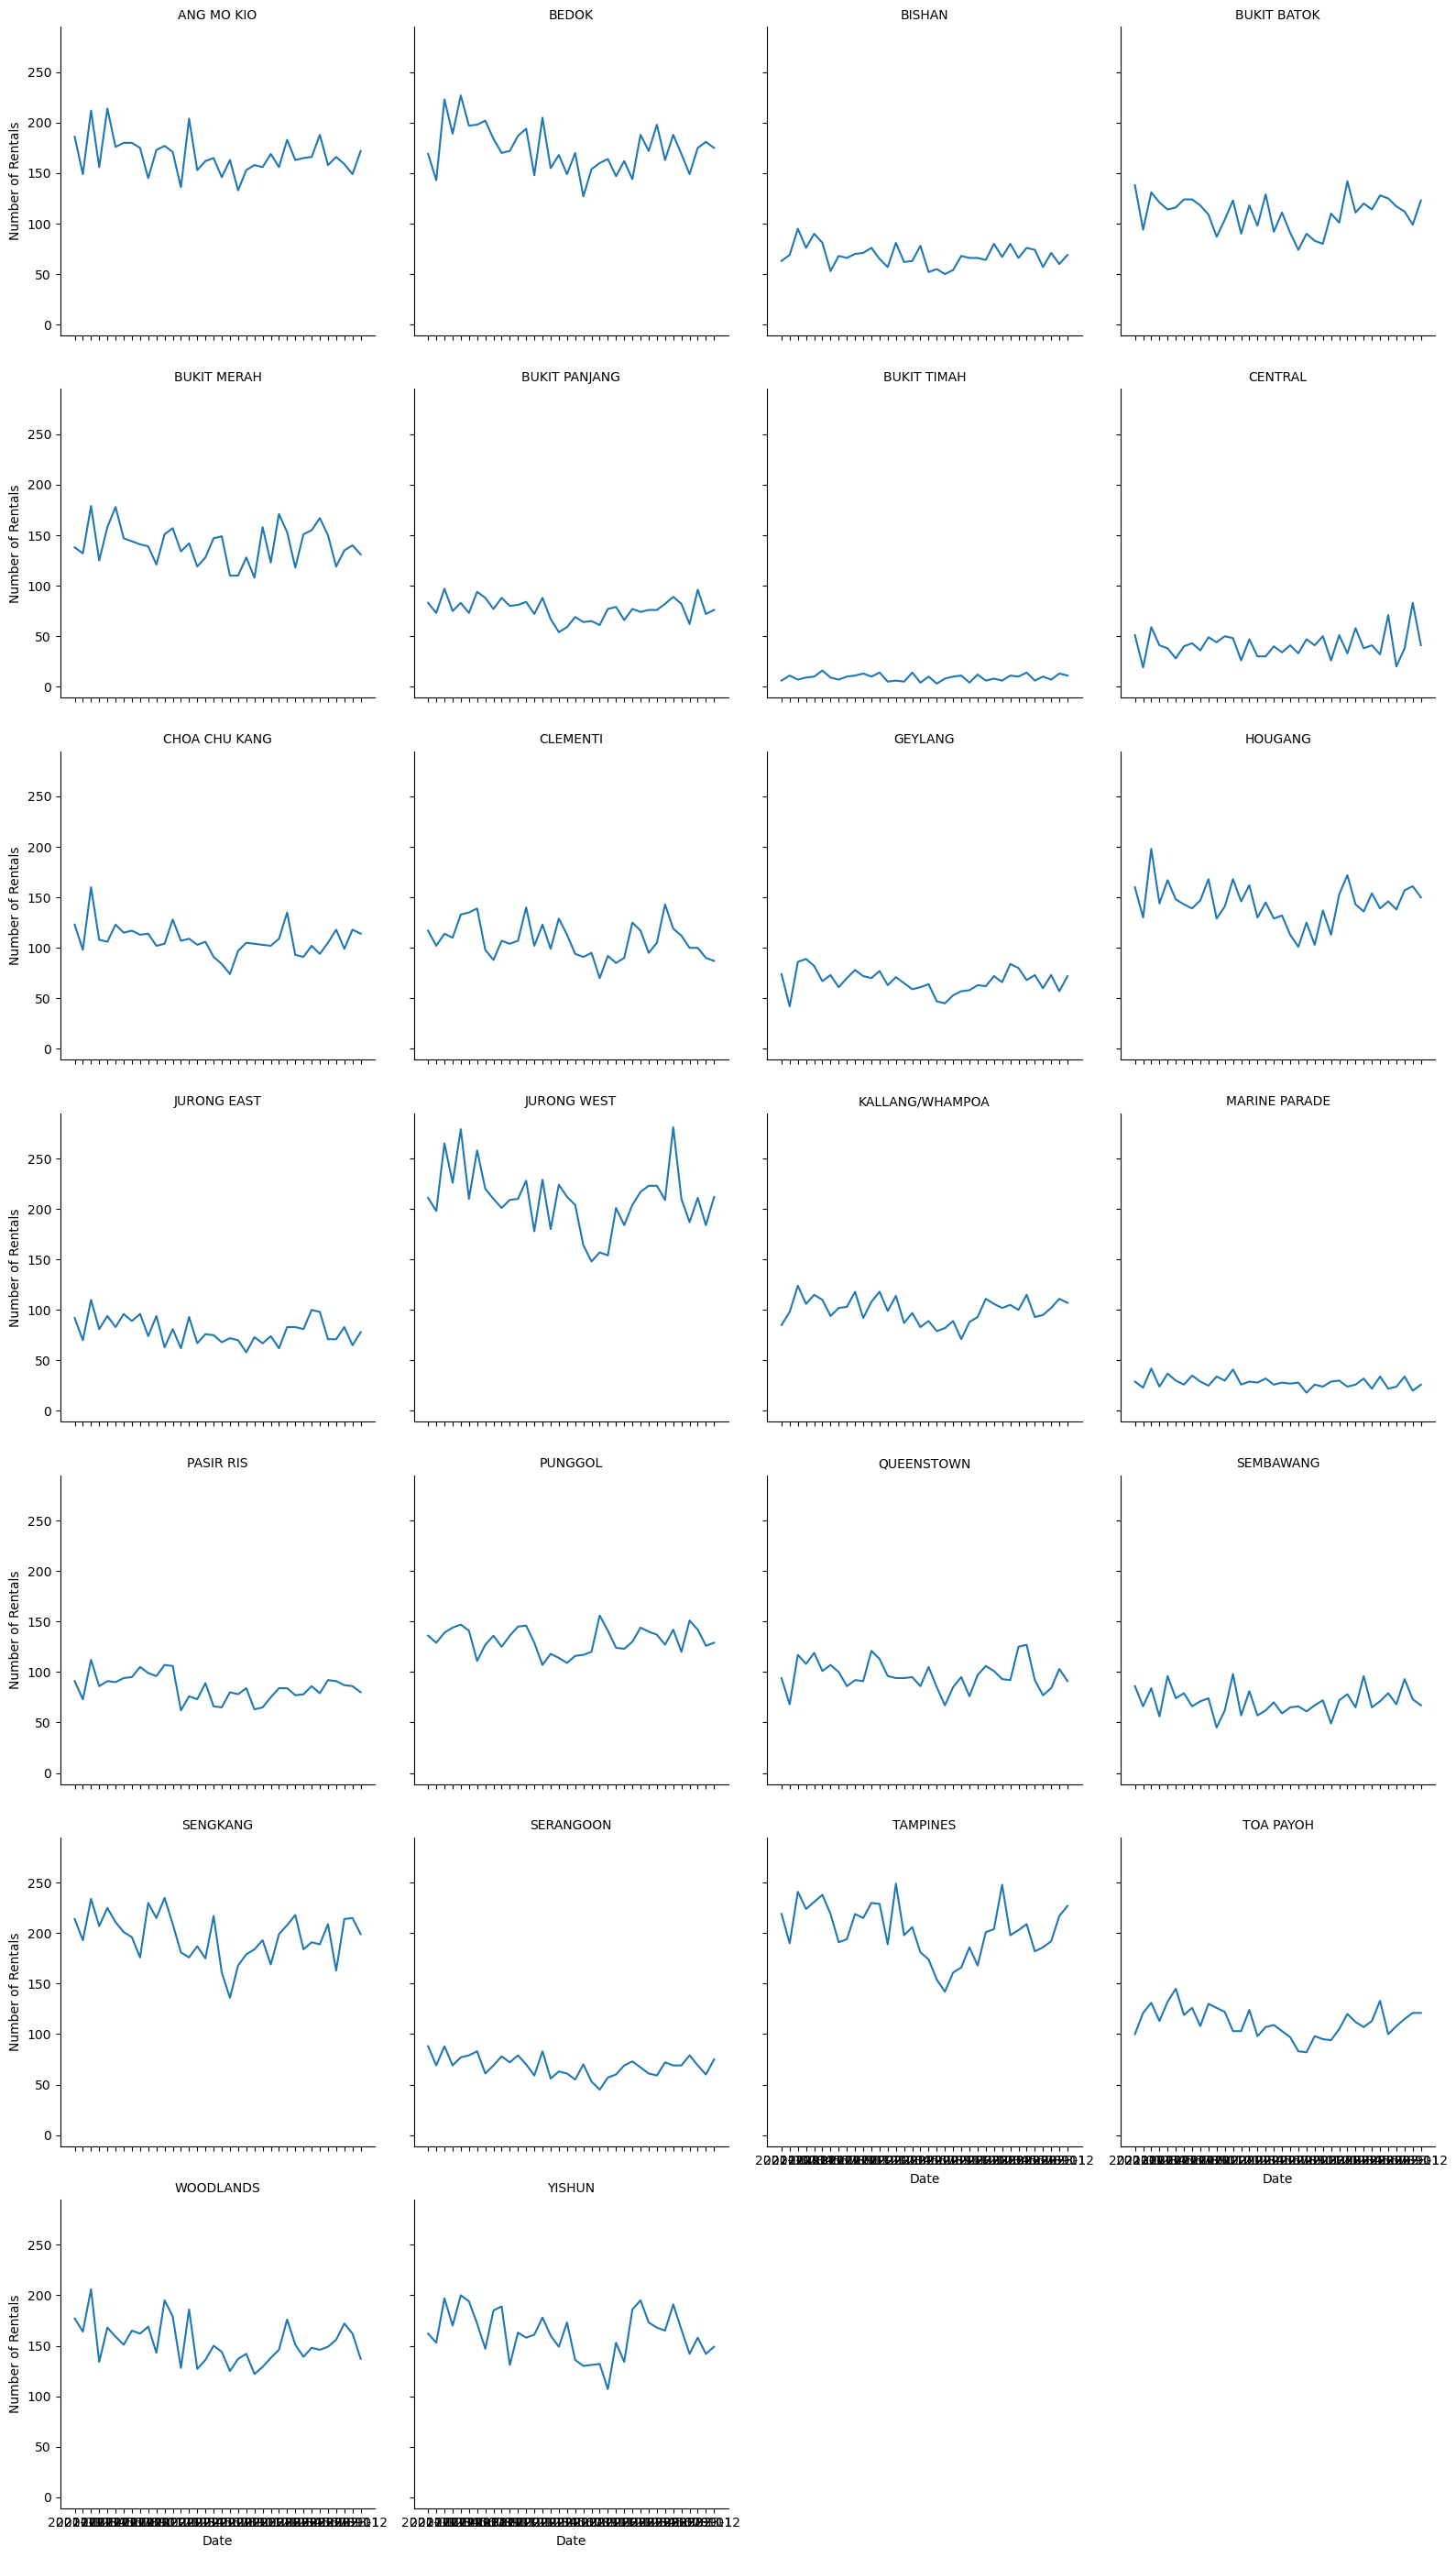

In [5]:
### Set Data Table ###
# Calculate the value counts and convert to DataFrame
#rental_trends_bytown = hdb_rentals.groupby(['town', 'flat_type']).size().unstack(fill_value=0)
rental_trends_bytown = rentals_dataset.groupby(['date', 'town']).size().sort_index()
rental_trends_bytown_df = rental_trends_bytown.reset_index()
rental_trends_bytown_df.columns = ['date', 'town', 'count']

### Plotting ###
# Set up the FacetGrid for sub line plots
g = sns.FacetGrid(rental_trends_bytown_df, col='town', col_wrap=4, height=4, sharex=True)
g = g.map(sns.lineplot, 'date', 'count')

# Graph Formatting
g = g.set_titles('{col_name}')
g.set_axis_labels('Date', 'Number of Rentals')

plt.show()

##### Box plot on monthly rental cost in each town based on flat type

Dashboard: - allow to filter by flat type

/var/folders/jx/wm1d645968d9y3dt9w8l2_1m0000gn/T/ipykernel_6470/3488335122.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
/var/folders/jx/wm1d645968d9y3dt9w8l2_1m0000gn/T/ipykernel_6470/3488335122.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
/var/folders/jx/wm1d645968d9y3dt9w8l2_1m0000gn/T/ipykernel_6470/3488335122.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
/var/folders/jx/wm1d645968d9y3dt9w8l2_1m0000gn/T/ipykernel_6470/3488335122.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedL

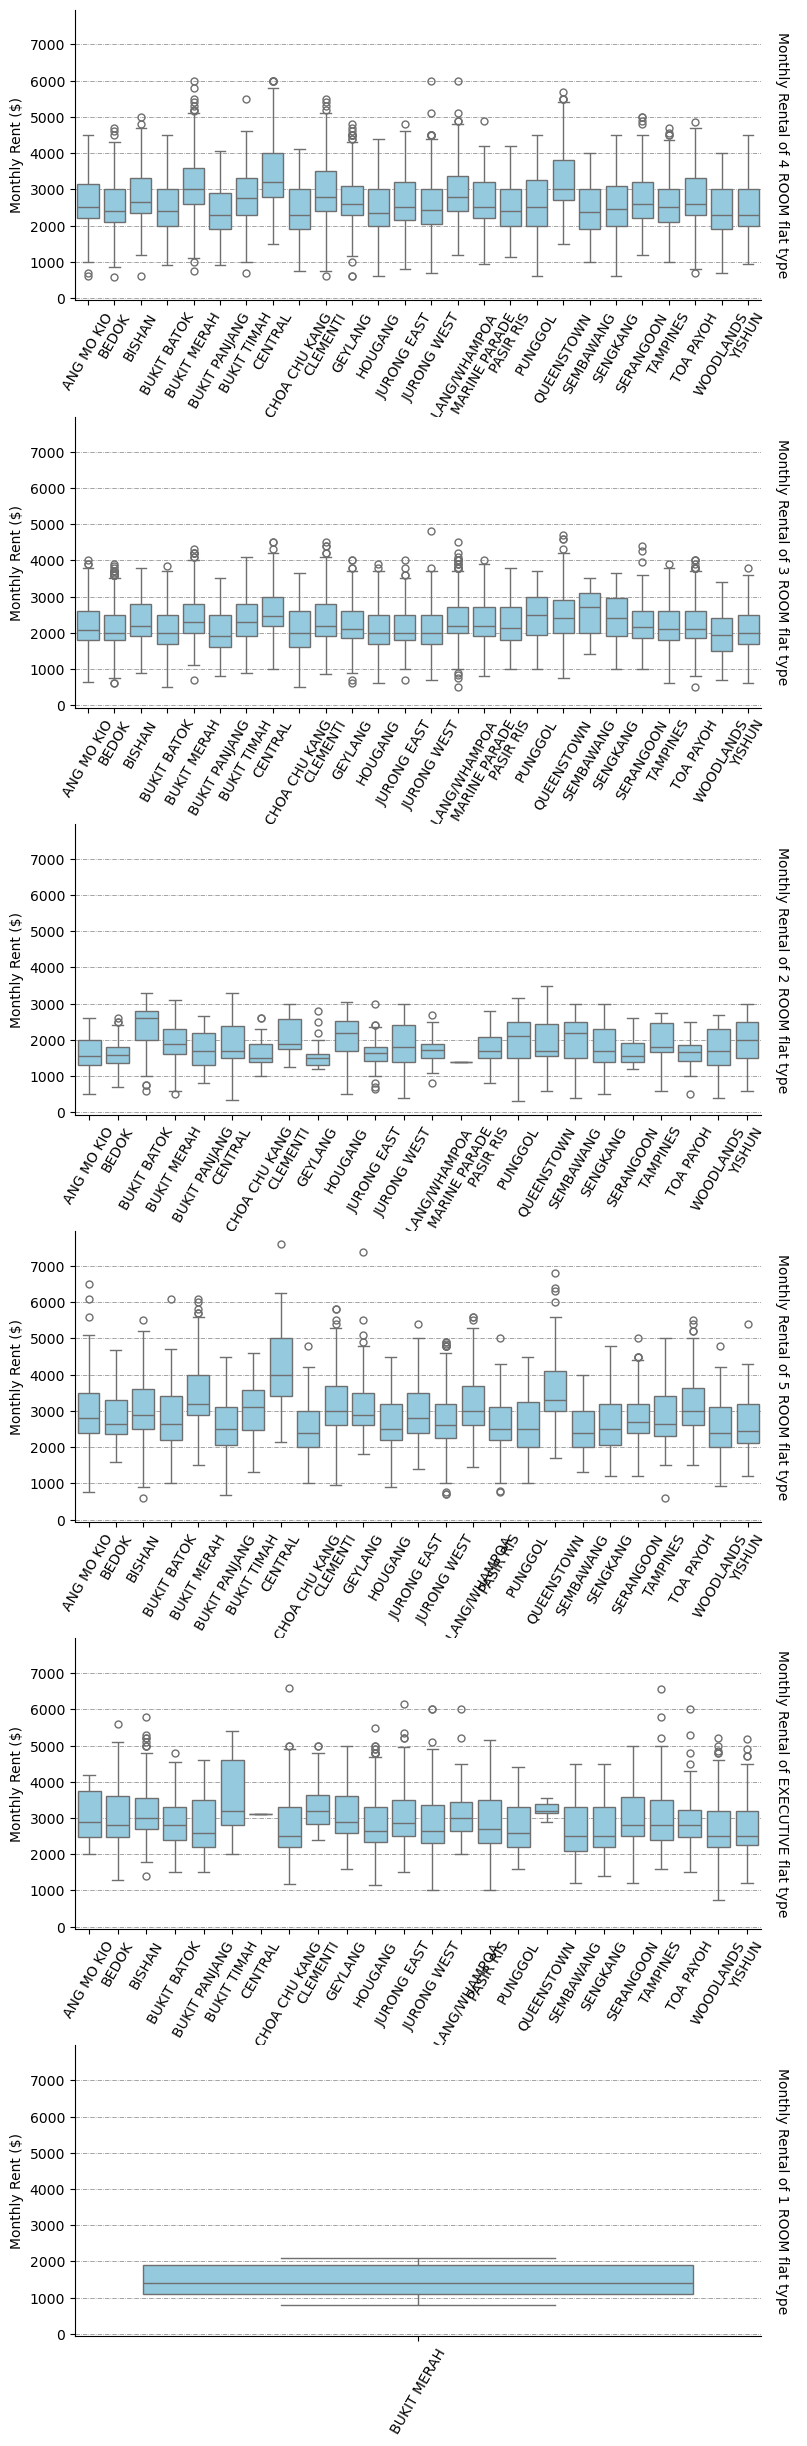

In [6]:
### Plotting ###
#palette = sns.color_palette("flare", n_colors=hdb_rentals['flat_type'].nunique())

g = sns.catplot(
    data=rentals_dataset.sort_values(by='town'),
    y="monthly_rent", x="town", row="flat_type",
    kind="box", orient="v",
    sharex=False, 
    margin_titles=True,
    height=4, aspect=2,
    color="skyblue"
)

# Graph Formatting
g.set(xlabel="", ylabel="Monthly Rent ($)")
g.set_titles(row_template="Monthly Rental of {row_name} flat type")

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60) 
    ax.grid(True, which='both', axis='y', color='gray', linestyle='-.', linewidth=0.5)
    
g.fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.savefig('monthlyrent_town.png', dpi=300, bbox_inches='tight')

#### scatter plot with subplots on train distance based on town
Identify the correlations of all the towns between train_dist and monthly_rent
- can go deeper by each town to identify patterns with the train locations

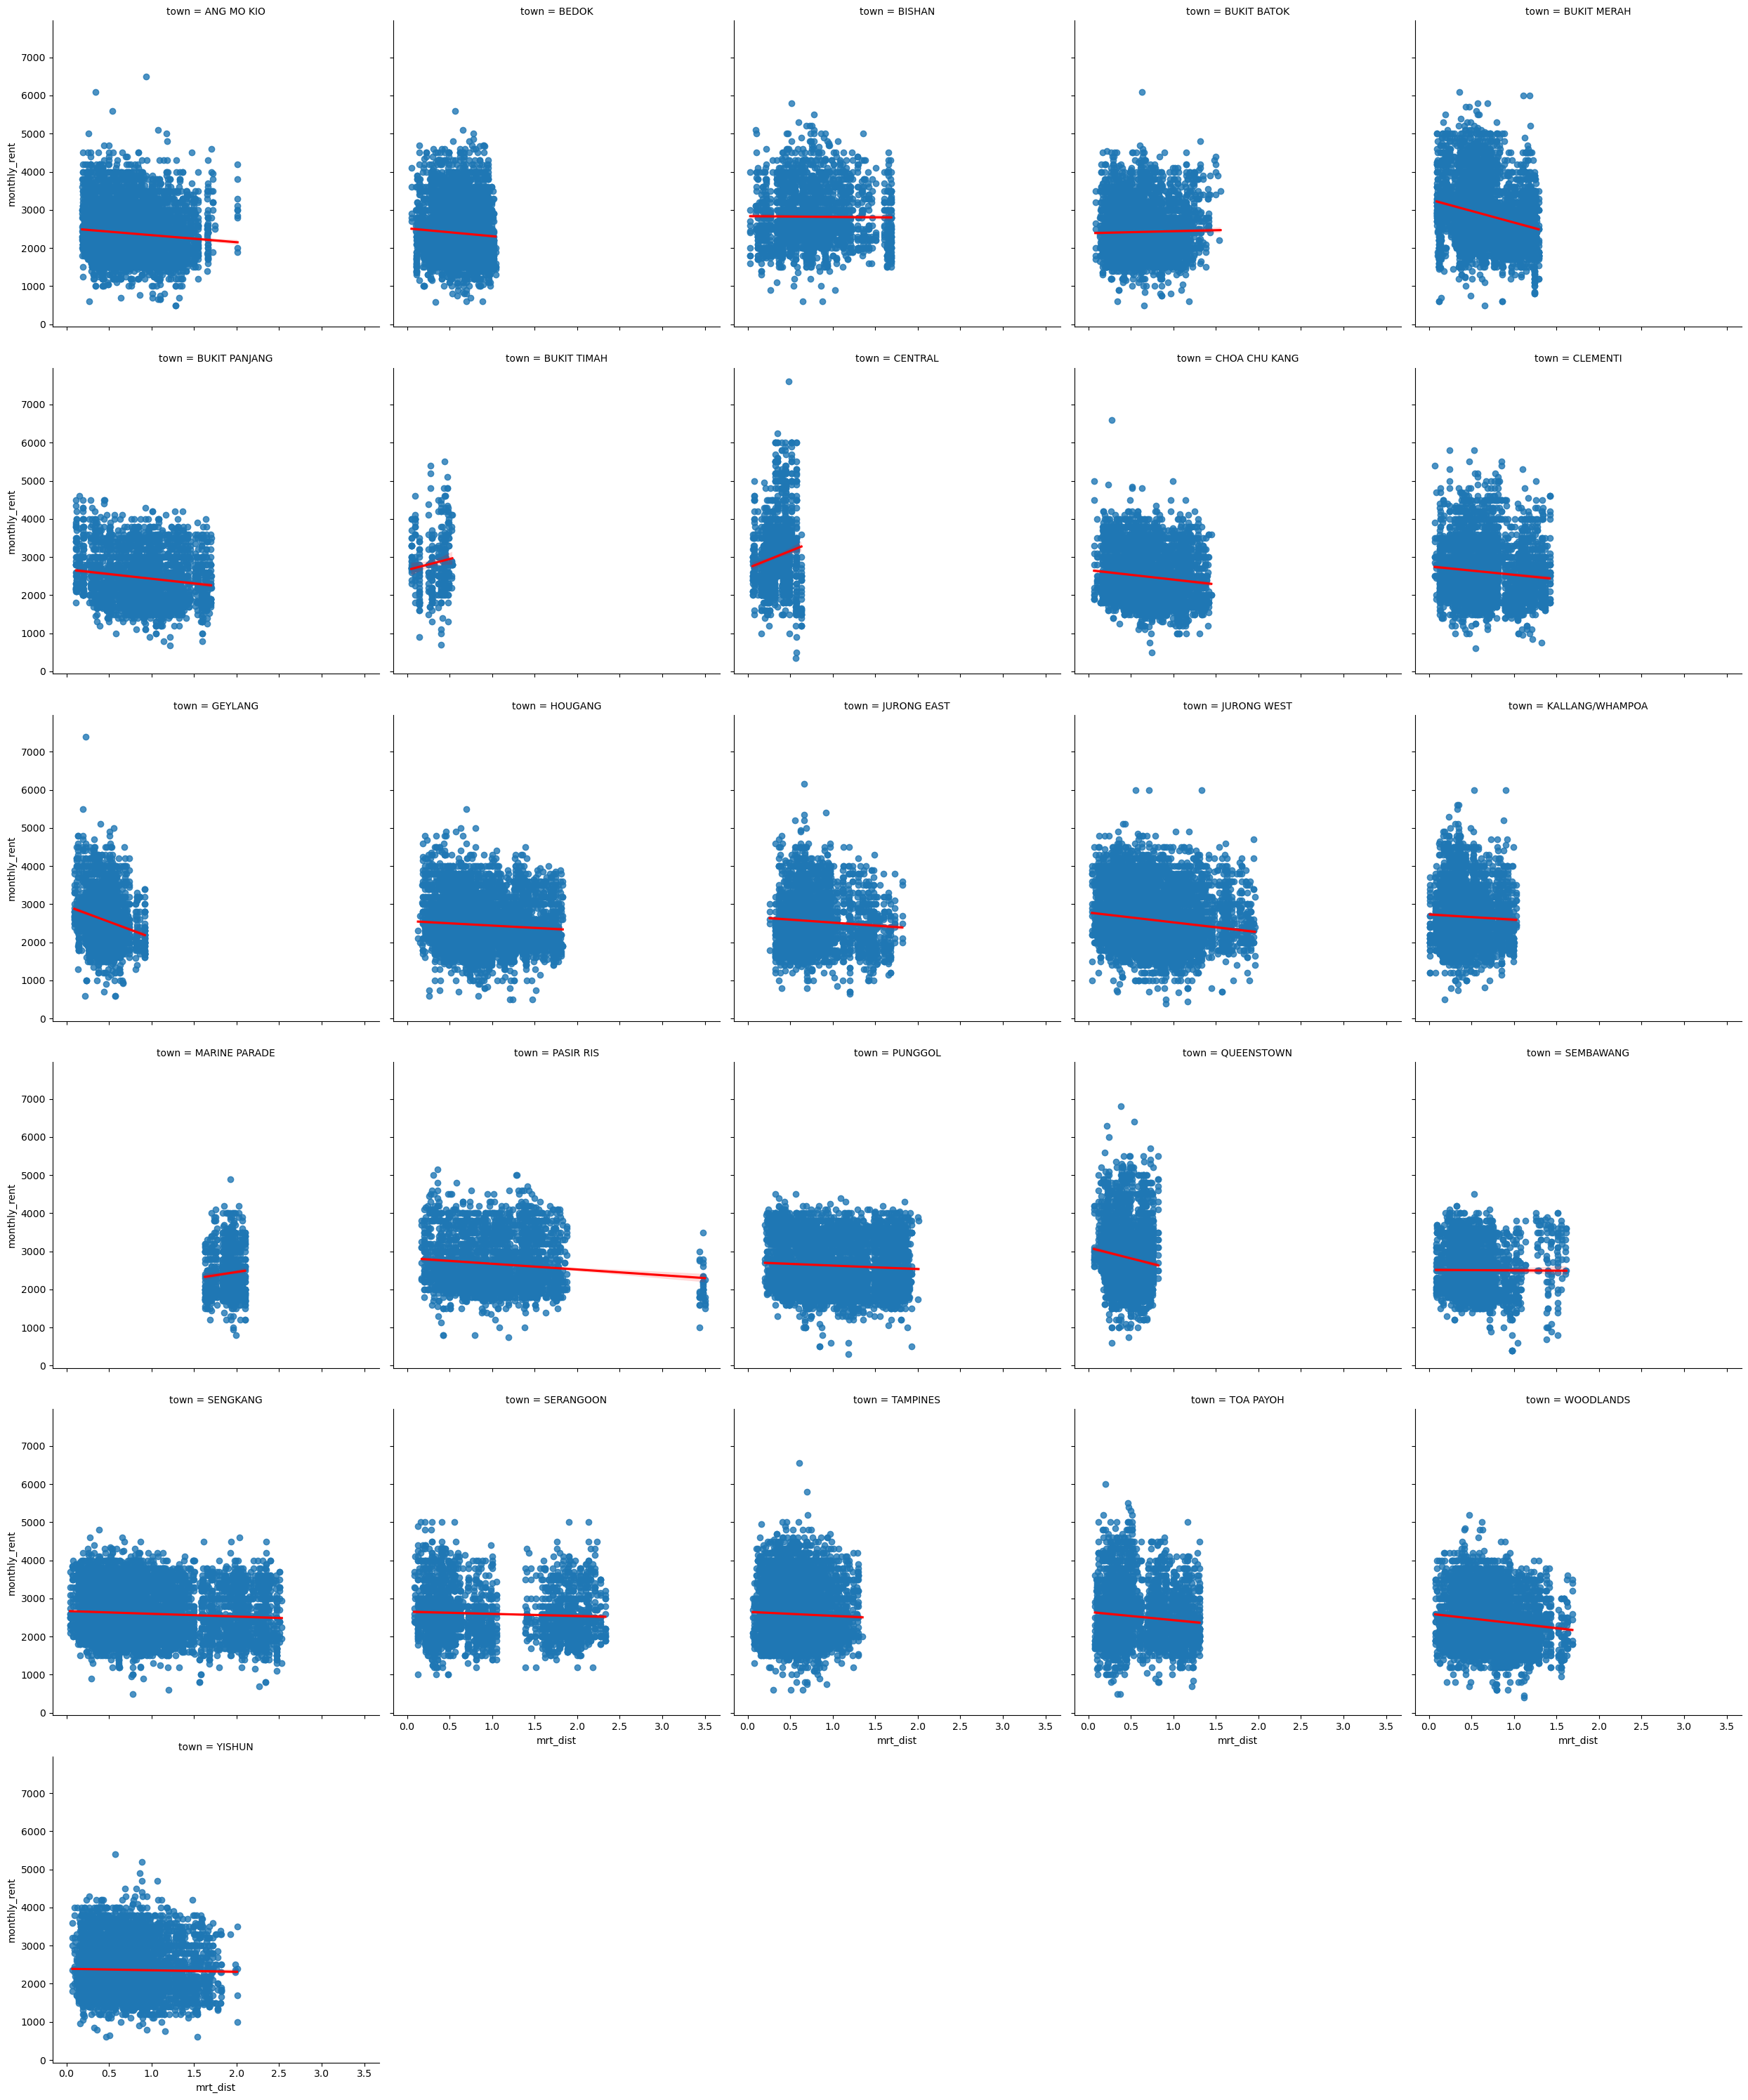

In [7]:
rent_train_corr = sns.lmplot(
    data=rentals_dataset, x="mrt_dist", y="monthly_rent",
    col="town", col_wrap=5, line_kws={'color': 'red'}
)

#### scatter plot with subplots on busstop distance based on town
Identify the correlations of all the towns between busstop_dist and monthly_rent
- can go deeper by each town to identify patterns with the busstops

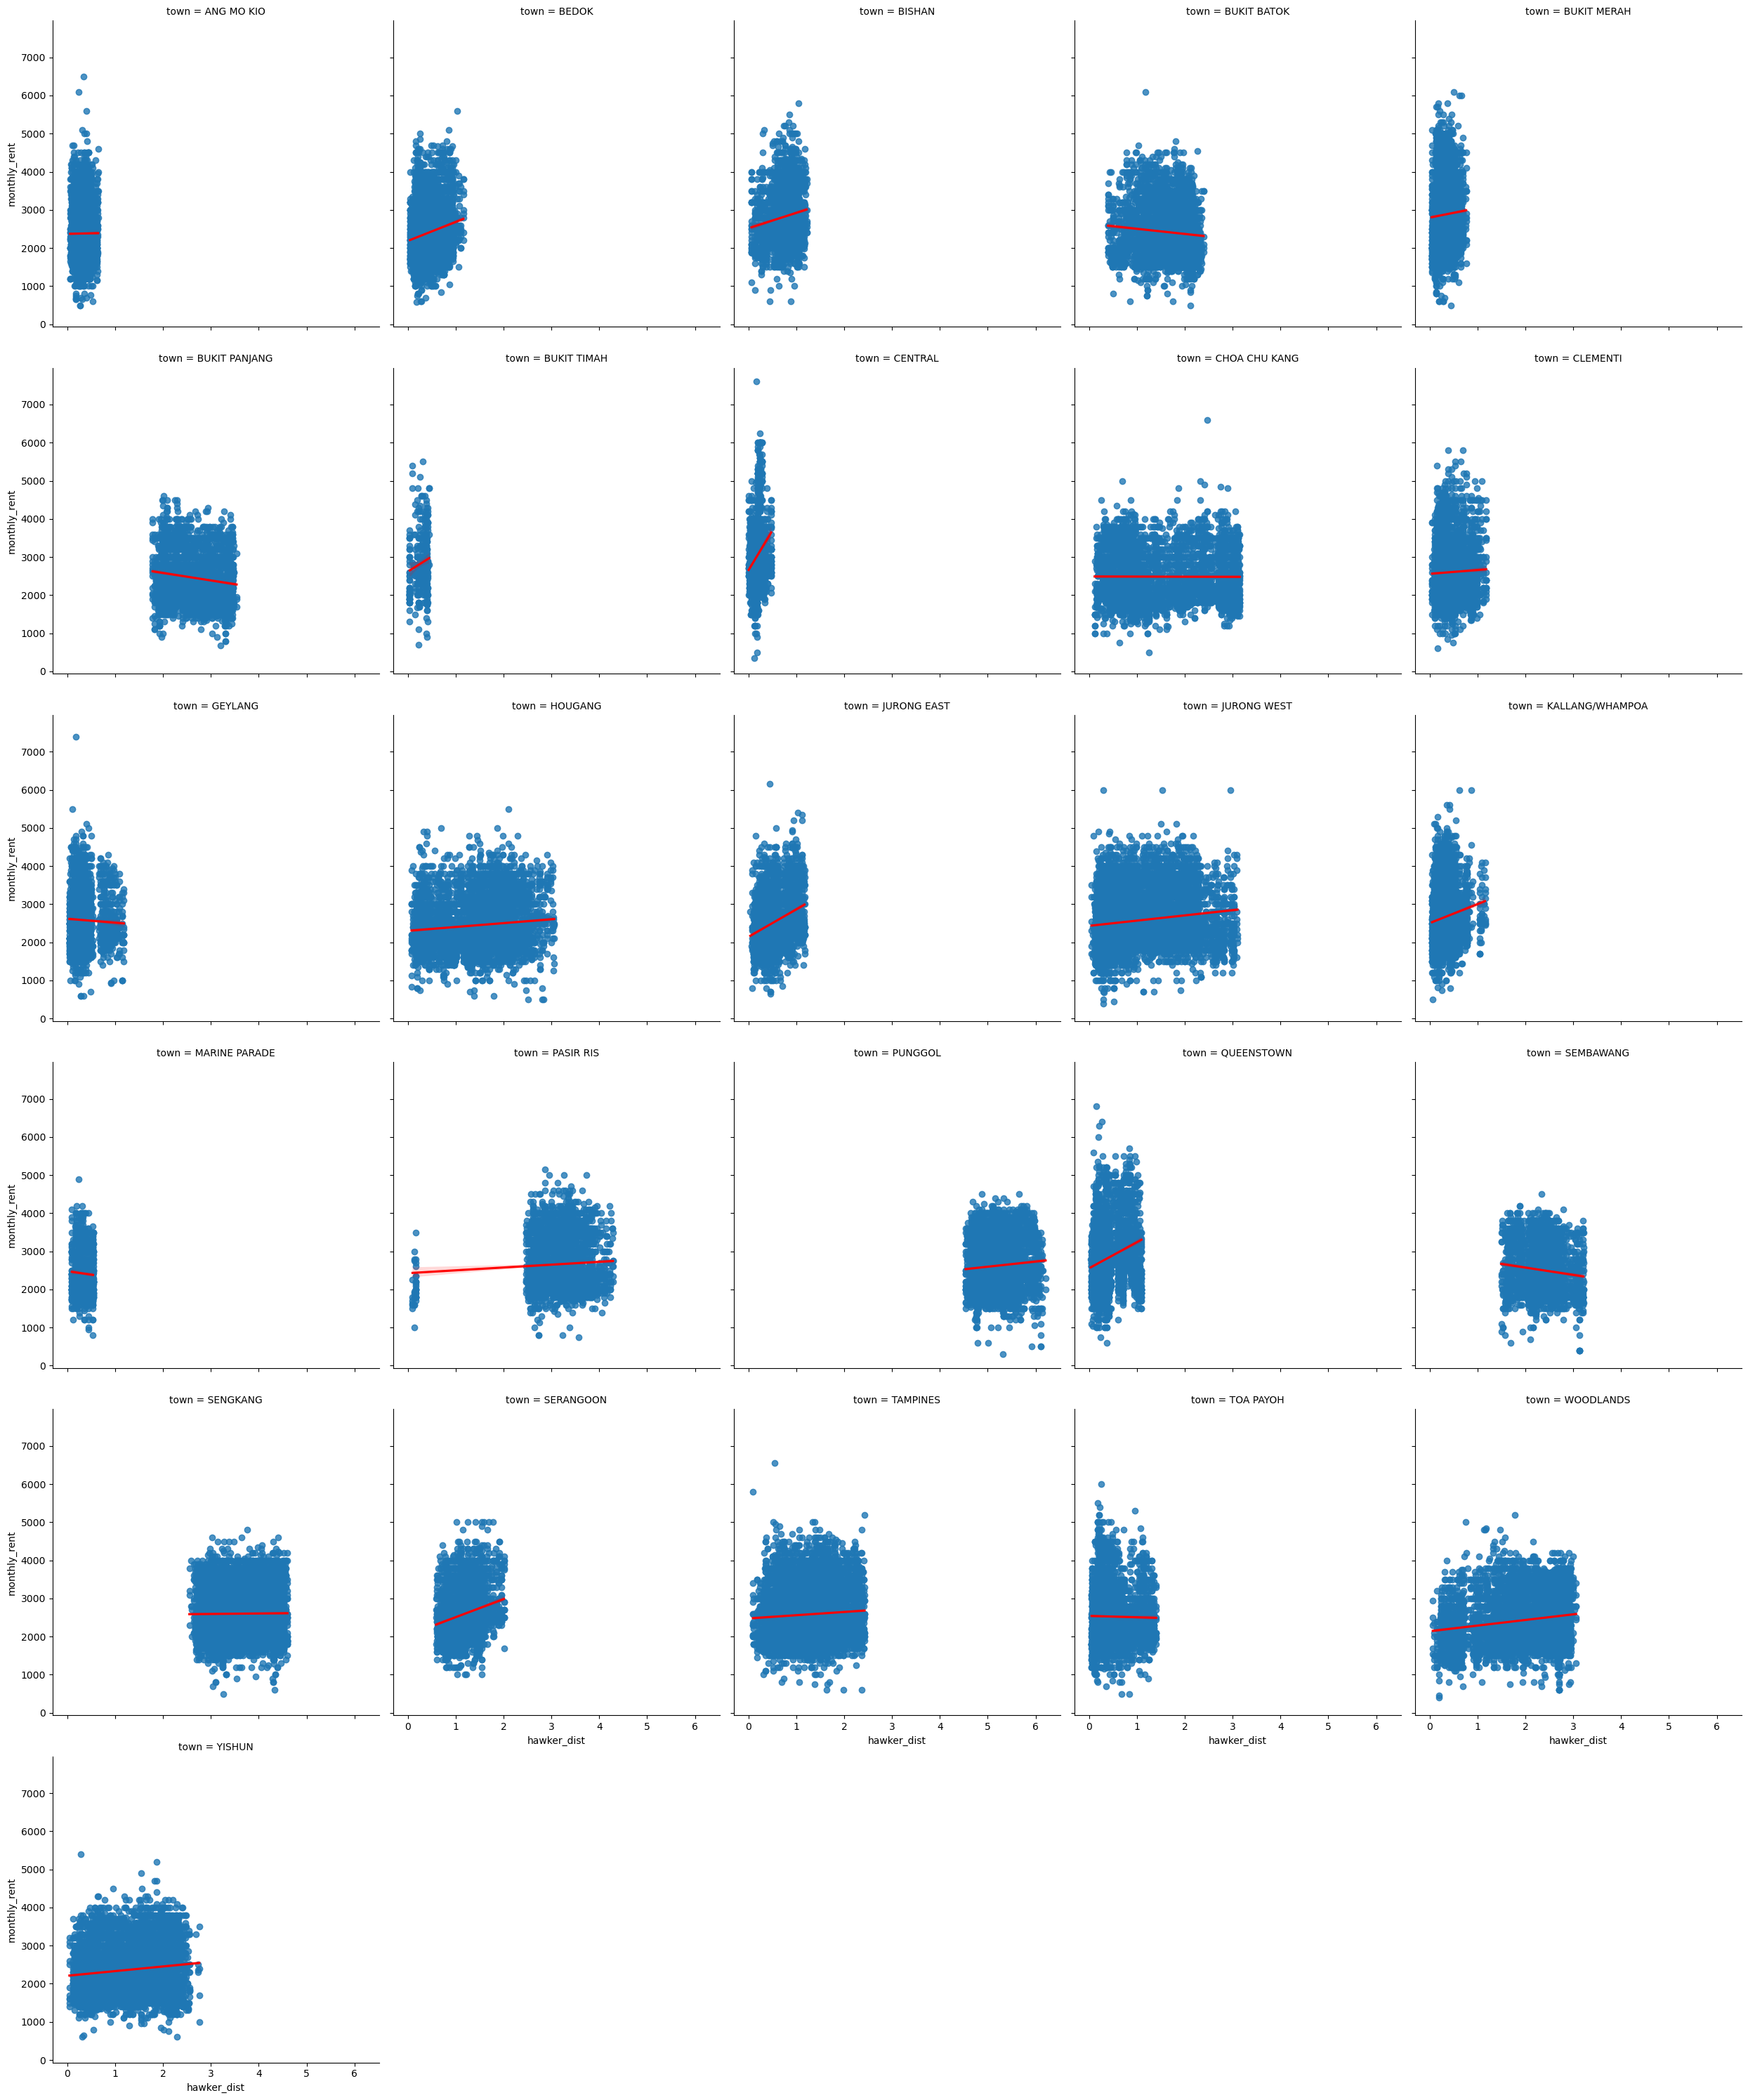

In [8]:

rent_busstop_corr = sns.lmplot(
    data=rentals_dataset, x="hawker_dist", y="monthly_rent",
    col="town", col_wrap=5, line_kws={'color': 'red'}
)


##### Geospatial plot on rental costing in each town

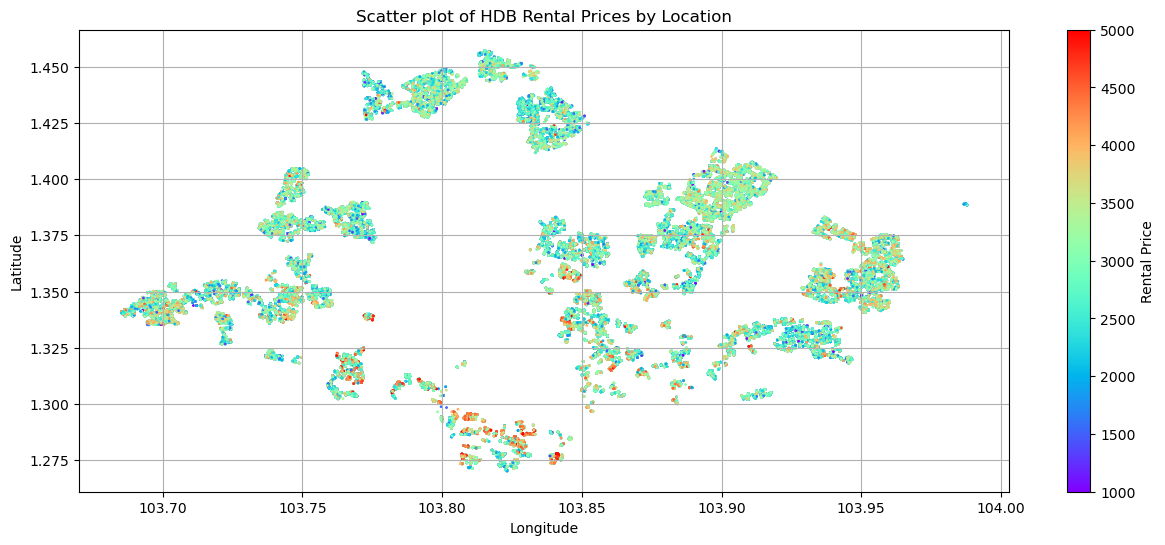

In [9]:
### PLOTTING ###
plt.figure(figsize=(15, 6))
plt.scatter(rentals_dataset['lng'], rentals_dataset['lat'], 
            c=rentals_dataset['monthly_rent'], cmap='rainbow', s=1,
            vmin=1000, vmax=5000)

### Formatting
plt.colorbar(label='Rental Price') # Adding a color bar which maps values to colors.
plt.grid(True)
plt.title('Scatter plot of HDB Rental Prices by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.xlim(min_longitude, max_longitude)
#plt.ylim(min_latitude, max_latitude)

# Show the plot.
plt.show()


In [19]:
### DATA INVESTIGATION ### to identify which the town has the highest monthly rent in the current dataset
rentals_dataset[rentals_dataset['monthly_rent'] == rentals_dataset['monthly_rent'].max()]


,date,town,block,street_name,flat_type,monthly_rent,flat_type_group,region,lat,lng,...,avg_floor_area_sqm,price_sqm,nearest_MRT,mrt_dist,nearest_shopping,shopping_dist,nearest_intschool,intschool_dist,nearest_hawker,hawker_dist
103956,2023-11,CENTRAL,2,TG PAGAR PLAZA,5 ROOM,7600,5-ROOM,Central,1.275237,103.842605,...,123.5,61.54,Tanjong Pagar,0.480517,Tanjong Pagar Centre,0.046414,SISH INSTITUTE,0.361488,6 Tanjong Pagar Plaza,0.165172


In [20]:
### DATA INVESTIGATION ### to identify which the town has the lowest monthly rent in the current dataset
rentals_dataset[rentals_dataset['monthly_rent'] == rentals_dataset['monthly_rent'].min()]


,date,town,block,street_name,flat_type,monthly_rent,flat_type_group,region,lat,lng,...,avg_floor_area_sqm,price_sqm,nearest_MRT,mrt_dist,nearest_shopping,shopping_dist,nearest_intschool,intschool_dist,nearest_hawker,hawker_dist
49987,2022-04,PUNGGOL,623C,PUNGGOL CTRL,2 ROOM,300,2-ROOM,Northeast,1.399633,103.911458,...,46.0,6.52,Punggol,1.184996,Oasis Terraces,0.400879,GLOBAL INDIAN INTERNATIONAL SCHOOL SMART CAMPUS,1.059274,Kovan Market & Food Centre,5.321818
